In [2]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import db_utils as du
import create_tables as ct


conn = ct.create_or_open_database()
df_fahrrad_Zähler = du.fetch_data_df('Standorten_Zählstelle',conn)
df_mess_Fahrrad= du.fetch_data_df('Messdaten_Fahrrad',conn)
df_bezirke= du.fetch_data_df('Bezirke',conn)
df_date = du.fetch_data_df('Date_dim',conn)
df_time = du.fetch_data_df('Time_dim',conn)

Establish SQLite connection.


In [3]:
# in order to make fetching data from the database faster:
#try to use chunksize in the fetch_data . but we have to define parameter 

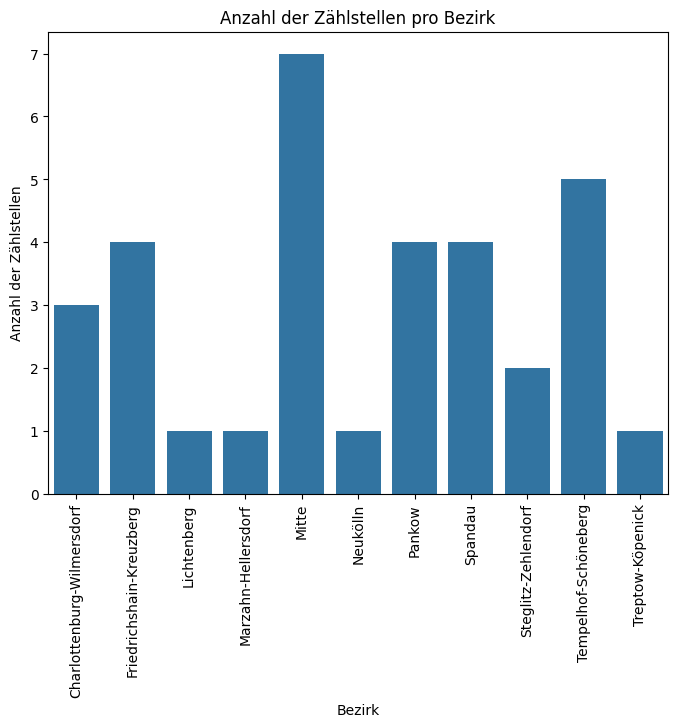

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of Zählstelle per Bezirk

df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")
counts = df_merged.groupby('Bezirk')['Zählstelle'].count().reset_index()
counts.rename(columns={'Zählstelle': 'Anzahl_Zählstelle'}, inplace=True)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Bezirk', y='Anzahl_Zählstelle', data=counts)

# Add labels and title
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Anzahl der Zählstellen')
plt.title('Anzahl der Zählstellen pro Bezirk')

# Display the plot
plt.show()


In [6]:
import pandas as pd
df_merged = pd.merge(df_fahrrad_Zähler, df_bezirke, on="Bezirk", how="inner")
df_merged = pd.merge(df_merged, df_mess_Fahrrad, on="Zählstelle", how="inner")
df_merged = pd.merge( df_merged,df_date, on="DateID",how="inner")
df_merged = pd.merge( df_merged,df_time, on="TimeID",how="inner")

,Zählstelle,Bezirk,Beschreibung,Installationsdatum,Breitengrad,Längengrad,Geometry,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
0,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",2,0,3.0,02.01.2018,2018,1,2,1,0,1,nachts
1,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",2,1,2.0,02.01.2018,2018,1,2,1,0,1,nachts
2,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",2,2,1.0,02.01.2018,2018,1,2,1,0,1,nachts
3,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",2,3,5.0,02.01.2018,2018,1,2,1,0,1,nachts
4,12-PA-SCH,Pankow,Schwedter Steg,2012-03-01 00:00:00,52.597193,13.440249,"MULTIPOLYGON (((13.3883808 52.5676794, 13.3884...",2,4,4.0,02.01.2018,2018,1,2,1,0,1,morgens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394299,03-SP-NO-W,Spandau,Nonnendammallee West,2023-11-22 00:00:00,52.525795,13.178813,"POLYGON ((13.1095585 52.4510789, 13.1097339 52...",2191,19,6.0,31.12.2023,2023,12,31,6,0,4,abends
1394300,03-SP-NO-W,Spandau,Nonnendammallee West,2023-11-22 00:00:00,52.525795,13.178813,"POLYGON ((13.1095585 52.4510789, 13.1097339 52...",2191,20,0.0,31.12.2023,2023,12,31,6,0,4,abends
1394301,03-SP-NO-W,Spandau,Nonnendammallee West,2023-11-22 00:00:00,52.525795,13.178813,"POLYGON ((13.1095585 52.4510789, 13.1097339 52...",2191,21,0.0,31.12.2023,2023,12,31,6,0,4,abends
1394302,03-SP-NO-W,Spandau,Nonnendammallee West,2023-11-22 00:00:00,52.525795,13.178813,"POLYGON ((13.1095585 52.4510789, 13.1097339 52...",2191,22,0.0,31.12.2023,2023,12,31,6,0,4,abends


In [7]:
df_merged.drop(columns=['Installationsdatum', 'Breitengrad','Beschreibung', 'Längengrad', 'Geometry'],axis=1,  inplace= True)


In [8]:
df_merged[df_merged['year']==2018]

,Zählstelle,Bezirk,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
0,12-PA-SCH,Pankow,2,0,3.0,02.01.2018,2018,1,2,1,0,1,nachts
1,12-PA-SCH,Pankow,2,1,2.0,02.01.2018,2018,1,2,1,0,1,nachts
2,12-PA-SCH,Pankow,2,2,1.0,02.01.2018,2018,1,2,1,0,1,nachts
3,12-PA-SCH,Pankow,2,3,5.0,02.01.2018,2018,1,2,1,0,1,nachts
4,12-PA-SCH,Pankow,2,4,4.0,02.01.2018,2018,1,2,1,0,1,morgens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308403,06-FK-FRA-W,Friedrichshain-Kreuzberg,365,19,17.0,31.12.2018,2018,12,31,0,0,4,abends
1308404,06-FK-FRA-W,Friedrichshain-Kreuzberg,365,20,13.0,31.12.2018,2018,12,31,0,0,4,abends
1308405,06-FK-FRA-W,Friedrichshain-Kreuzberg,365,21,14.0,31.12.2018,2018,12,31,0,0,4,abends
1308406,06-FK-FRA-W,Friedrichshain-Kreuzberg,365,22,4.0,31.12.2018,2018,12,31,0,0,4,abends


In [9]:
df_merged.columns

Index(['Zählstelle', 'Bezirk', 'DateID', 'TimeID', 'Wert', 'Date', 'year',
       'month', 'day', 'day_of_the_week', 'is_holiday', 'quarter',
       'time_of_the_day'],
      dtype='object')

In [10]:
df_merged[df_merged['Bezirk']== 'Mitte']

,Zählstelle,Bezirk,DateID,TimeID,Wert,Date,year,month,day,day_of_the_week,is_holiday,quarter,time_of_the_day
52296,02-MI-JAN-N,Mitte,2,0,6.0,02.01.2018,2018,1,2,1,0,1,nachts
52297,02-MI-JAN-N,Mitte,2,1,7.0,02.01.2018,2018,1,2,1,0,1,nachts
52298,02-MI-JAN-N,Mitte,2,2,8.0,02.01.2018,2018,1,2,1,0,1,nachts
52299,02-MI-JAN-N,Mitte,2,3,3.0,02.01.2018,2018,1,2,1,0,1,nachts
52300,02-MI-JAN-N,Mitte,2,4,2.0,02.01.2018,2018,1,2,1,0,1,morgens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389355,04-MI-NO,Mitte,2191,19,4.0,31.12.2023,2023,12,31,6,0,4,abends
1389356,04-MI-NO,Mitte,2191,20,7.0,31.12.2023,2023,12,31,6,0,4,abends
1389357,04-MI-NO,Mitte,2191,21,7.0,31.12.2023,2023,12,31,6,0,4,abends
1389358,04-MI-NO,Mitte,2191,22,3.0,31.12.2023,2023,12,31,6,0,4,abends


In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns


#X :Month Y: Wert Hue: Bezirke
df_2018 = df_merged[df_merged['year'] == 2018]
df_2022 = df_merged[df_merged['year']== 2022]

In [12]:
print(df_2022['Bezirk'].unique())

['Pankow' 'Mitte' 'Charlottenburg-Wilmersdorf' 'Tempelhof-Schöneberg'
 'Friedrichshain-Kreuzberg' 'Lichtenberg' 'Marzahn-Hellersdorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Neukölln' 'Treptow-Köpenick']


In [13]:
print(df_2018['Bezirk'].unique())

['Pankow' 'Mitte' 'Charlottenburg-Wilmersdorf' 'Tempelhof-Schöneberg'
 'Friedrichshain-Kreuzberg' 'Lichtenberg' 'Marzahn-Hellersdorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Neukölln' 'Treptow-Köpenick']


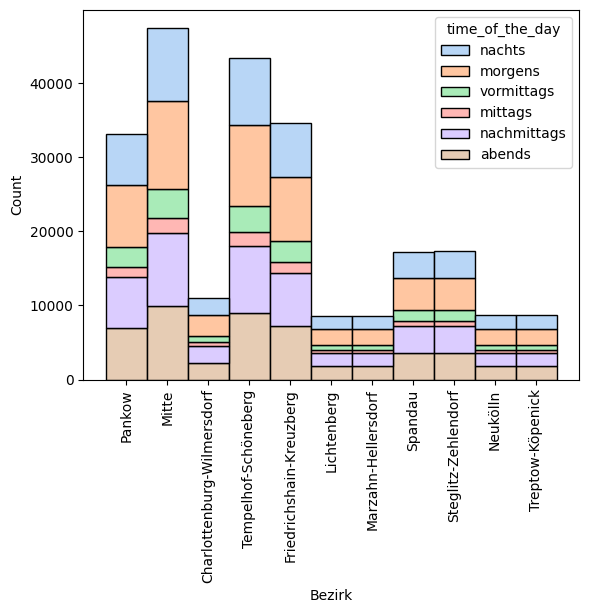

In [14]:

sns.histplot(x ='Bezirk' , data = df_2022, hue = 'time_of_the_day', palette = 'pastel', multiple = 'stack' )
plt.xticks(rotation = 90)
plt.show()

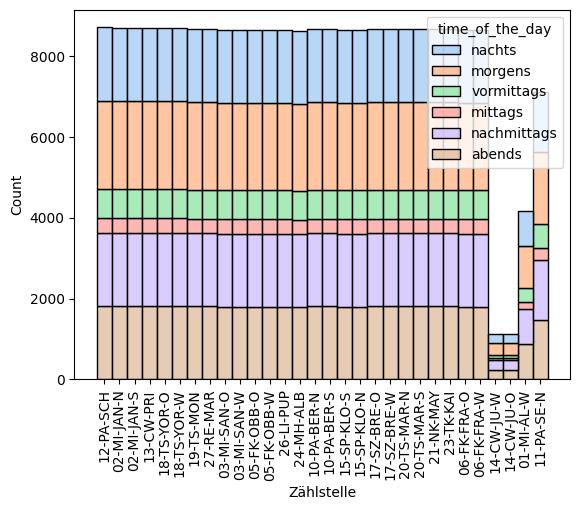

In [15]:
sns.histplot(x ='Zählstelle' , data =  df_2022, hue = 'time_of_the_day', palette = 'pastel', multiple = 'stack' )
plt.xticks(rotation = 90)
plt.show()

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


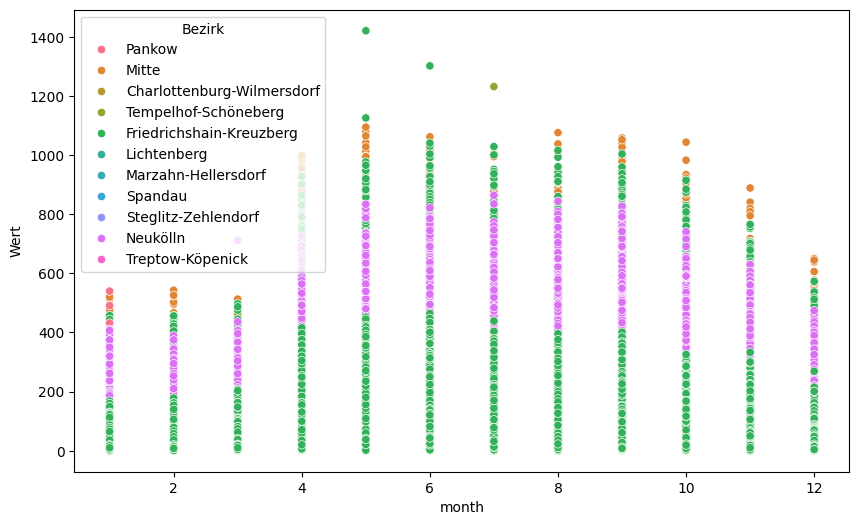

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot( x= df_2018['month'],y=df_2018['Wert'], hue=df_merged['Bezirk'])
plt.show()


In [17]:
df_2018_Mitte=df_2018[df_2018['Bezirk']=='Mitte']

([<matplotlib.axis.XTick at 0x20bbfa1c2f0>,
 [Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250'),
  Text(300, 0, '300'),
  Text(350, 0, '350'),
  Text(400, 0, '400'),
  Text(450, 0, '450')])

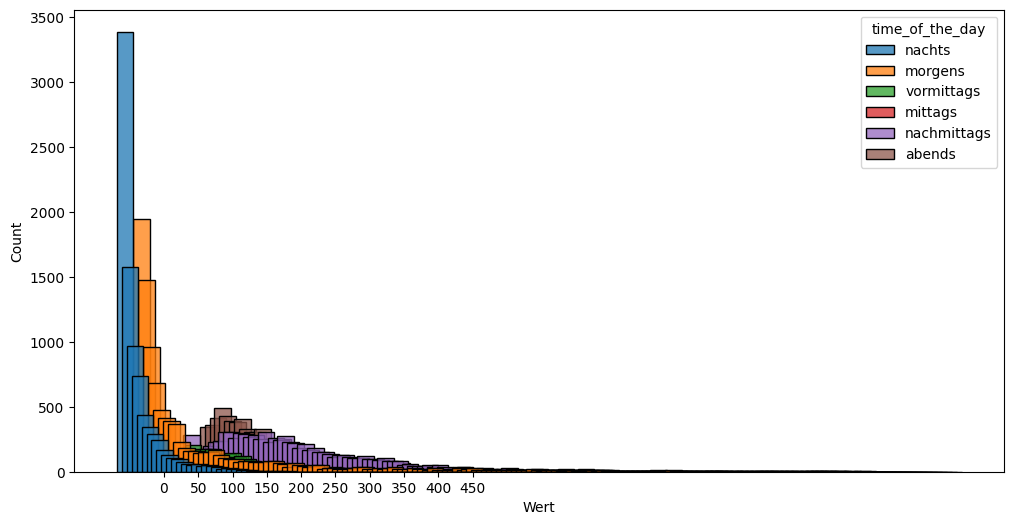

In [18]:
plt.figure(figsize=(12, 6)) 
sns.histplot(data=df_2018_Mitte, x='Wert',
             multiple='dodge', stat='count',hue ='time_of_the_day', element='bars',shrink=20)
plt.xticks(range(0,500,50),range(0,500,50))

Text(0.5, 0, 'Uhrzeit ( stunde)')

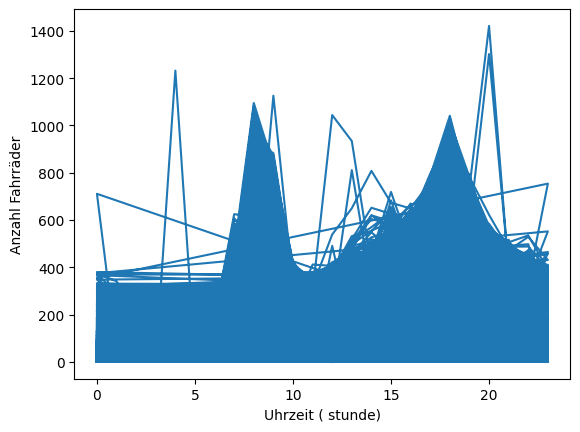

In [19]:
plt.plot(df_2018['TimeID'],df_2018['Wert'])
plt.ylabel('Anzahl Fahrräder')
plt.xlabel('Uhrzeit ( stunde)')

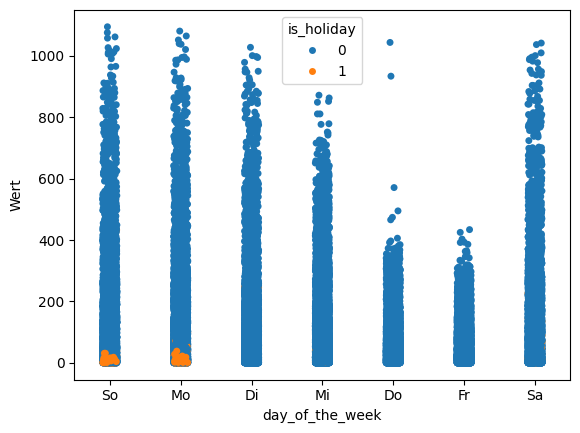

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.stripplot(x='day_of_the_week', y='Wert', data=df_2018_Mitte, jitter=True, hue ='is_holiday')
plt.xticks(ticks=[1,2,3,4,5,6,0], labels=['Mo','Di','Mi','Do','Fr','Sa','So'])
plt.show()

In [ ]:
sns.swarmplot(x='day_of_the_week', y='Wert', data=df_2018_Mitte, size=3)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16684\2650475722.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Bezirk', y='Wert',  data=df_2018, ci=None)
C:\Users\user\AppData\Local\Temp\ipykernel_16684\2650475722.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Holiday')


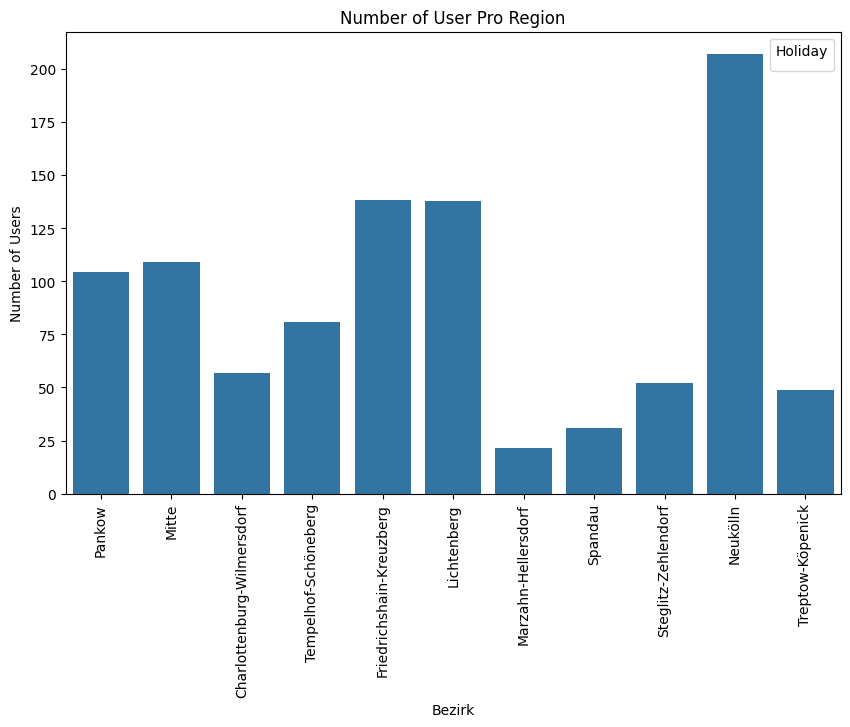

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018)
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

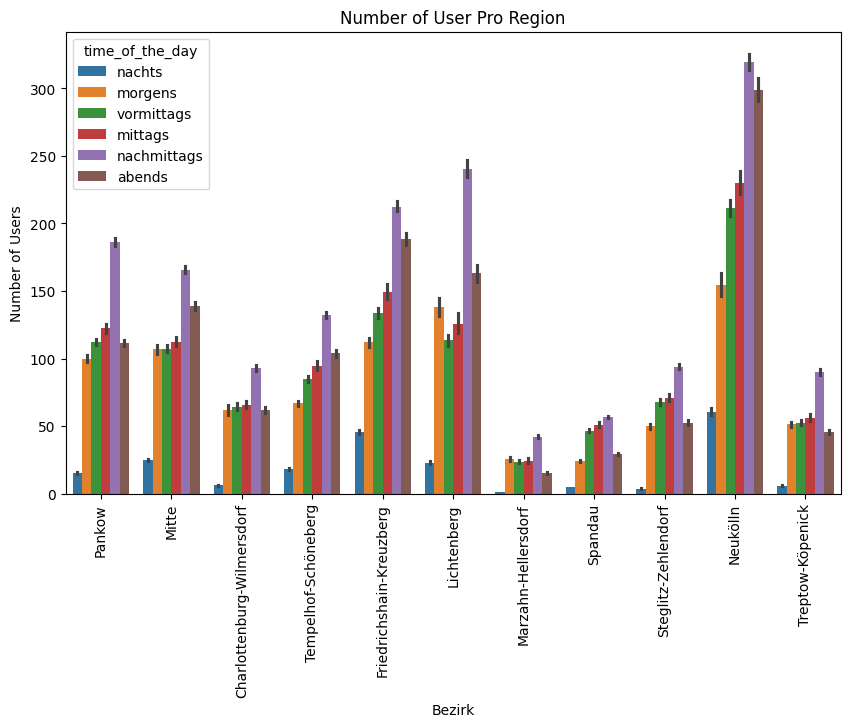

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Bezirk', y='Wert',  data=df_2018,hue='time_of_the_day')
plt.title('Number of User Pro Region')
plt.xlabel('Bezirk')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.show()

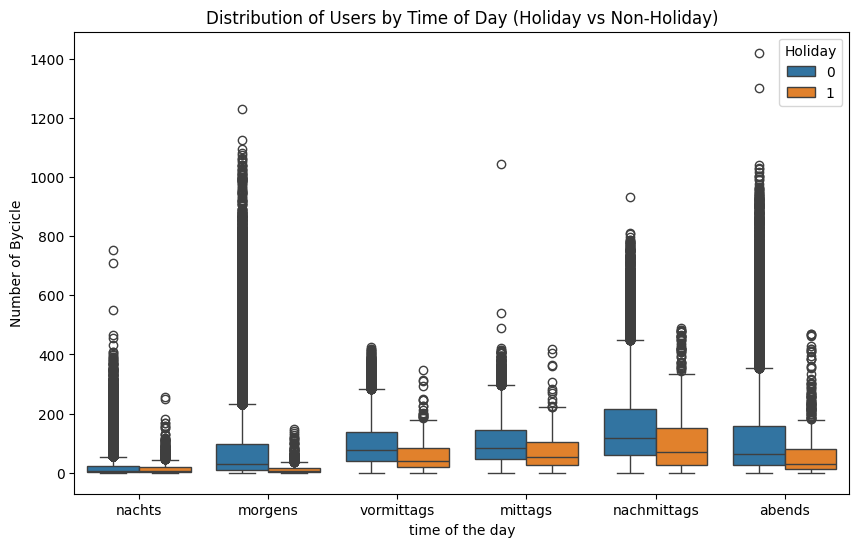

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018)
plt.title('Distribution of Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('time of the day')
plt.ylabel('Number of Bycicle')
plt.legend(title='Holiday')
plt.show()


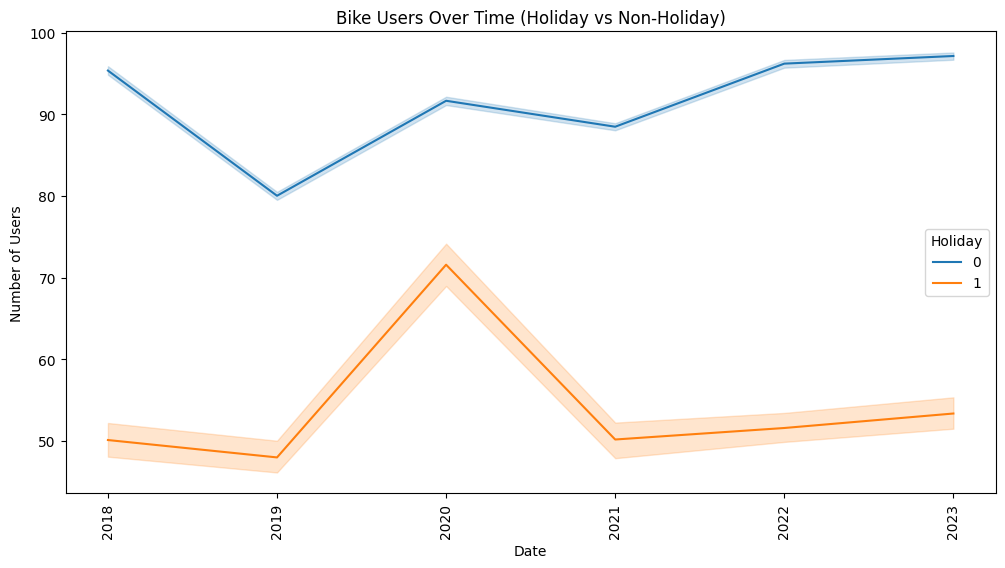

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Wert', hue='is_holiday', data=df_merged)
plt.title('Bike Users Over year (Holiday vs Non-Holiday)')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()


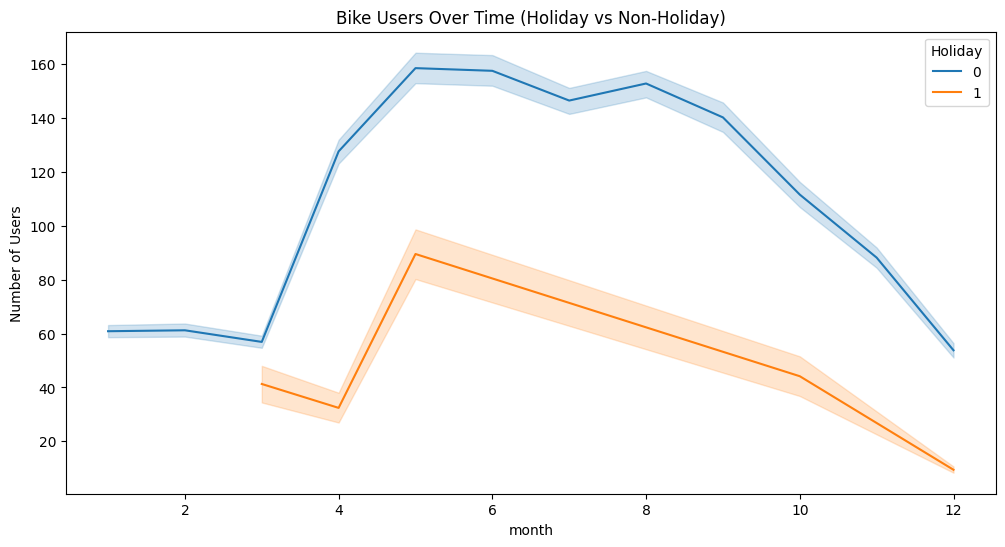

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Wert', hue='is_holiday', data=df_2018_Mitte)
plt.title('Bike Users Over Time (Holiday vs Non-Holiday)')
plt.xlabel('month')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16684\4168915655.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018_Mitte, ci=None)


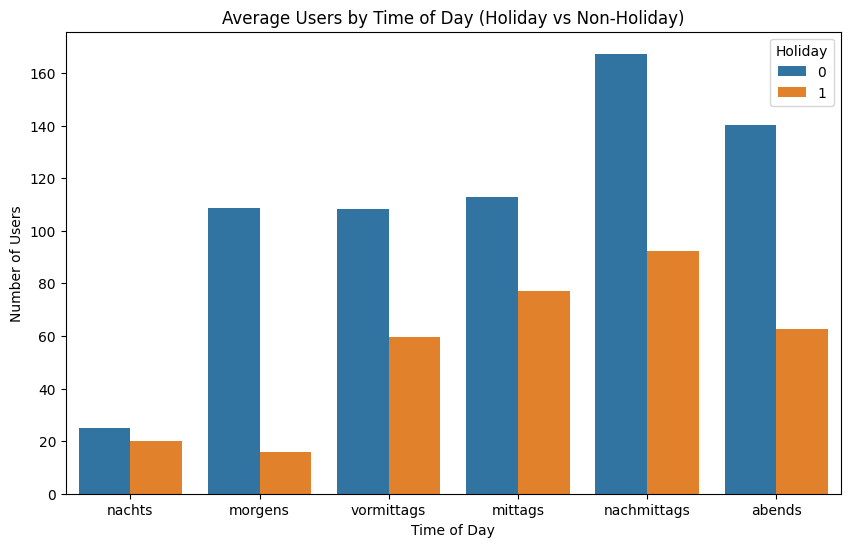

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_the_day', y='Wert', hue='is_holiday', data=df_2018_Mitte, ci=None)
plt.title('Average Users by Time of Day (Holiday vs Non-Holiday)')
plt.xlabel('Time of Day')
plt.ylabel('Number of Users')
plt.legend(title='Holiday')
plt.show()

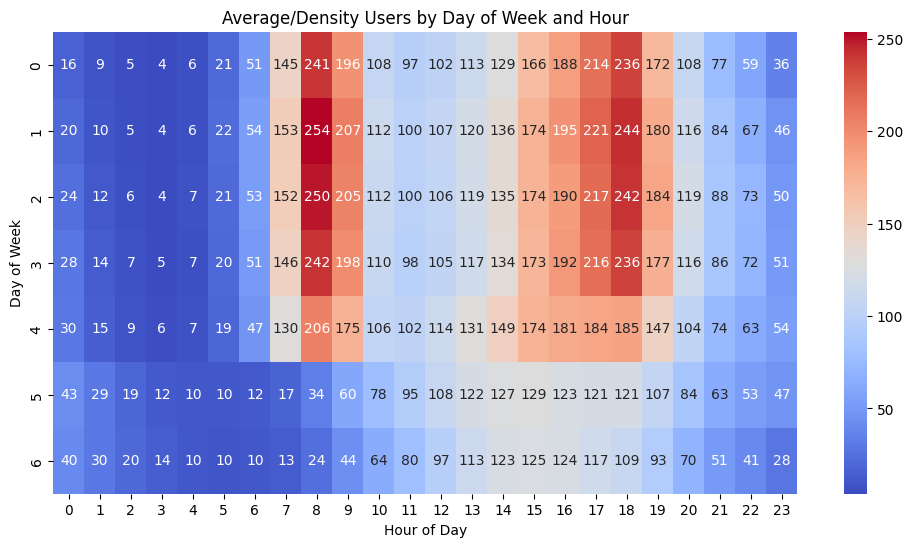

In [28]:
# Pivot table: rows = day, columns = hour, values = mean users
pivot = df_2018.pivot_table(values='Wert', index='day_of_the_week', columns='TimeID', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average/Density Users by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()
